In [1]:
import os                           
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_0910 = pd.read_excel("season_2009_10.xlsx")
df_1011 = pd.read_excel("season_2010_11.xlsx")
df_1112 = pd.read_excel("season_2011_12.xlsx")
df_1213 = pd.read_excel("season_2012_13.xlsx")
df_1314 = pd.read_excel("season_2013_14.xlsx")
df_1415 = pd.read_excel("season_2014_15.xlsx")
df_1516 = pd.read_excel("season_2015_16.xlsx")
df_1617 = pd.read_excel("season_2016_17.xlsx")
df_1718 = pd.read_excel("season_2017_18.xlsx")
df_1819 = pd.read_excel("season_2018_19.xlsx")

wiki_df_0910 = pd.read_excel("wiki_2009_10.xlsx")
wiki_df_1011 = pd.read_excel("wiki_2010_11.xlsx")
wiki_df_1112 = pd.read_excel("wiki_2011_12.xlsx")
wiki_df_1213 = pd.read_excel("wiki_2012_13.xlsx")
wiki_df_1314 = pd.read_excel("wiki_2013_14.xlsx")
wiki_df_1415 = pd.read_excel("wiki_2014_15.xlsx")
wiki_df_1516 = pd.read_excel("wiki_2015_16.xlsx")
wiki_df_1617 = pd.read_excel("wiki_2016_17.xlsx")
wiki_df_1718 = pd.read_excel("wiki_2017_18.xlsx")
wiki_df_1819 = pd.read_excel("wiki_2018_19.xlsx")

dfs = [df_0910.copy(), df_1011.copy(), df_1112.copy(), df_1213.copy(), df_1314.copy(), 
       df_1415.copy(), df_1516.copy(), df_1617.copy(), df_1718.copy(), df_1819.copy()]

wiki_dfs = [wiki_df_0910.copy(), wiki_df_1011.copy(), wiki_df_1112.copy(), wiki_df_1213.copy(), wiki_df_1314.copy(), 
            wiki_df_1415.copy(), wiki_df_1516.copy(), wiki_df_1617.copy(), wiki_df_1718.copy(), wiki_df_1819.copy()]

for df in dfs:
    df.drop(columns=['Unnamed: 0'],inplace=True)

for df in wiki_dfs:
    df.drop(columns=['Unnamed: 0'],inplace=True)

# For the ML
df_2122 = pd.read_excel("season_2021_22.xlsx").copy()
wiki_df_2122 = pd.read_excel("wiki_2021_22.xlsx").copy()

df_2122.drop(columns=['Unnamed: 0'],inplace=True)
wiki_df_2122.drop(columns=['Unnamed: 0'],inplace=True)

df_mc = pd.DataFrame()
df_mc["Top4 / Rest of the teams"] = ["Top 4", "Rest of the teams"]
df_mc["Common nation percentage"] = [0,0]
df_mc["Average players age"] = [0,0]
df_mc["Average num of players in the team"] = [0,0]
df_mc["Rotation"] = [0,0]
df_mc["Goals"] = [0,0]
df_mc["Assists"] = [0,0]
df_mc

,Top4 / Rest of the teams,Common nation percentage,Average players age,Average num of players in the team,Rotation,Goals,Assists
0,Top 4,0,0,0,0,0,0
1,Rest of the teams,0,0,0,0,0,0


In [3]:
# Investigate the top 4 teams, and rest of the teams most common nation percentage throughout the 10 seasons

# The top 4 teams, and the rest of the teams in each season
def teams(df_wiki):
    top4, rest_teams = [],[]
    for t in df_wiki["Team"][:4]:
        top4.append(t)
    for t in df_wiki["Team"][4:20]:
        rest_teams.append(t)
    return top4, rest_teams

# The percentage of the most common nation in the team 
def percentage_of_common_nation(team,df):
    team_in_df = df.loc[df["Team"]==team]
    num_of_players_in_team = len(team_in_df)
    most_popular_nation = team_in_df["Nation"].value_counts()[0]
    return (most_popular_nation/num_of_players_in_team)

# The average percentage of the most common nation
# in the top 4 teams, and the rest of the teams throughout the last decade
def most_common_nation_avg_percentage(dfs,wiki_dfs):
    top4_avg = []
    rest_teams_avg = []
    for i in range(0,10):
        top4_temp_avg = []
        rest_teams_temp_avg = []
        
        top_4,rest_teams  = teams(wiki_dfs[i])
        
        for team in top_4:
            top4_temp_avg.append(percentage_of_common_nation(team,dfs[i]))
        for team in rest_teams:
            rest_teams_temp_avg.append(percentage_of_common_nation(team,dfs[i]))
            
        top4_avg.append(sum(top4_temp_avg)/4)
        rest_teams_avg.append(sum(rest_teams_temp_avg)/16)
    
    return top4_avg,rest_teams_avg

Text(0, 0.5, 'Percentage')

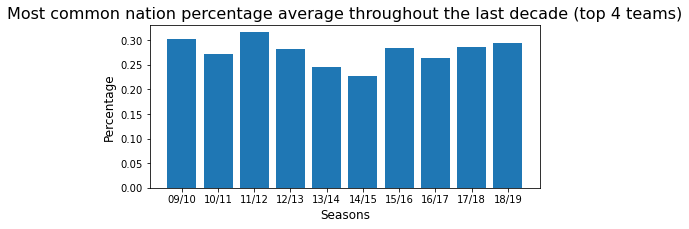

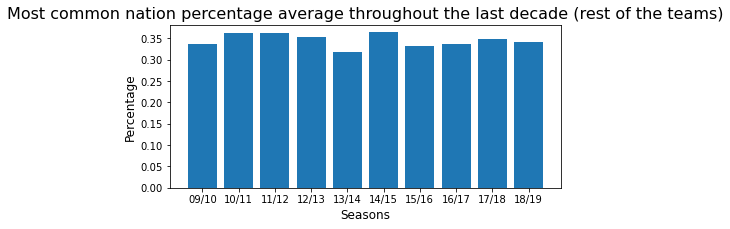

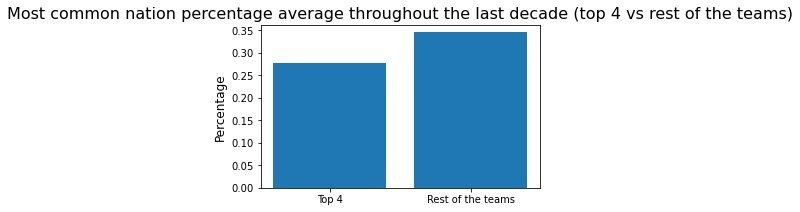

In [4]:
seasons = ['09/10','10/11','11/12','12/13','13/14','14/15','15/16','16/17','17/18','18/19']

top4_avg_nation, rest_teams_avg_nation = most_common_nation_avg_percentage(dfs,wiki_dfs)

plt.figure(figsize = (7,3))
plt.bar(seasons,top4_avg_nation)
plt.title("Most common nation percentage average throughout the last decade (top 4 teams)",fontsize=16)
plt.xlabel("Seasons",fontsize=12)
plt.ylabel("Percentage",fontsize=12)

plt.figure(figsize = (7,3))
plt.bar(seasons,rest_teams_avg_nation)
plt.title("Most common nation percentage average throughout the last decade (rest of the teams)",fontsize=16)
plt.xlabel("Seasons",fontsize=12)
plt.ylabel("Percentage",fontsize=12)

avg_top4_avg_nation = sum(top4_avg_nation)/10
avg_rest_teams_avg_nation = sum(rest_teams_avg_nation)/10
df_mc["Common nation percentage"] = [avg_top4_avg_nation,avg_rest_teams_avg_nation]

plt.figure(figsize = (5,3))
plt.bar(["Top 4", "Rest of the teams"],[avg_top4_avg_nation,avg_rest_teams_avg_nation])
plt.title("Most common nation percentage average throughout the last decade (top 4 vs rest of the teams)",fontsize=16)
plt.ylabel("Percentage",fontsize=12)

In [5]:
# Investigate the top 4 teams, and the rest of the teams average players age throughout the 10 seasons

# The average age of players in the team
def avg_of_players_age(team,df):
    team_in_df = df.loc[df["Team"]==team]
    num_of_players_in_team = len(team_in_df)
    return team_in_df["Age"].mean()

# The average age of the players
# in the top 4 teams, and the rest of the teams throughout the last decade
def avg_age_avg(dfs,wiki_dfs):
    top4_avg = []
    rest_teams_avg = []
    for i in range(0,10):
        top4_temp_avg = []
        rest_teams_temp_avg = []
        
        top_4,rest_teams  = teams(wiki_dfs[i])
        
        for team in top_4:
            top4_temp_avg.append(avg_of_players_age(team,dfs[i]))
        for team in rest_teams:
            rest_teams_temp_avg.append(avg_of_players_age(team,dfs[i]))
            
        top4_avg.append(sum(top4_temp_avg)/4)
        rest_teams_avg.append(sum(rest_teams_temp_avg)/16)
    return top4_avg,rest_teams_avg


Text(0, 0.5, 'Percentage')

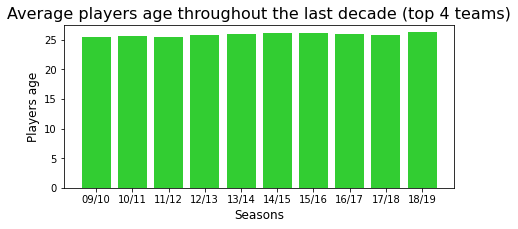

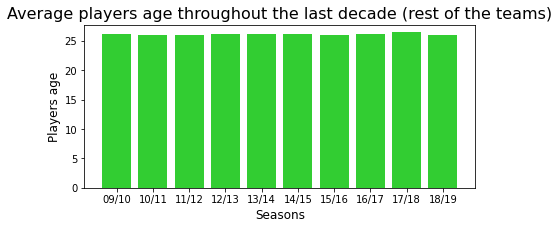

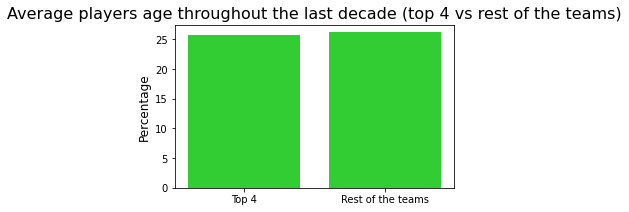

In [6]:
top4_avg_age, rest_teams_avg_age = avg_age_avg(dfs,wiki_dfs)

plt.figure(figsize = (7,3))
plt.bar(seasons,top4_avg_age, color ="limegreen")
plt.title("Average players age throughout the last decade (top 4 teams)",fontsize=16)
plt.xlabel("Seasons",fontsize=12)
plt.ylabel("Players age",fontsize=12)

plt.figure(figsize = (7,3))
plt.bar(seasons,rest_teams_avg_age, color ="limegreen")
plt.title("Average players age throughout the last decade (rest of the teams)",fontsize=16)
plt.xlabel("Seasons",fontsize=12)
plt.ylabel("Players age",fontsize=12)

avg_top4_avg_age = sum(top4_avg_age)/10
avg_rest_teams_avg_age = sum(rest_teams_avg_age)/10
df_mc["Average players age"] = [avg_top4_avg_age, avg_rest_teams_avg_age]

plt.figure(figsize = (5,3))
plt.bar(["Top 4", "Rest of the teams"],[avg_top4_avg_age, avg_rest_teams_avg_age],  color ="limegreen")
plt.title("Average players age throughout the last decade (top 4 vs rest of the teams)",fontsize=16)
plt.ylabel("Percentage",fontsize=12)

In [7]:
# Investigate the top 4 teams, and the rest of the teams average number of players in the team throughout the 10 seasons

# The number of players in the team
def num_of_players(team,df):
    team_in_df = df.loc[df["Team"]==team]
    return len(team_in_df)

# The average number of players
# in the top 4 teams, and the rest of the teams throughout the last decade
def num_of_players_avg(dfs,wiki_dfs):
    top4_avg = []
    rest_teams_avg = []
    
    for i in range(0,10):
        top4_temp_avg = []
        rest_teams_temp_avg = []
        
        top_4,rest_teams  = teams(wiki_dfs[i])
        
        for team in top_4:
            top4_temp_avg.append(num_of_players(team,dfs[i]))
        for team in rest_teams:
            rest_teams_temp_avg.append(num_of_players(team,dfs[i]))
        
        top4_avg.append(sum(top4_temp_avg)/4)
        rest_teams_avg.append(sum(rest_teams_temp_avg)/16)
    return top4_avg,rest_teams_avg

Text(0, 0.5, 'Percentage')

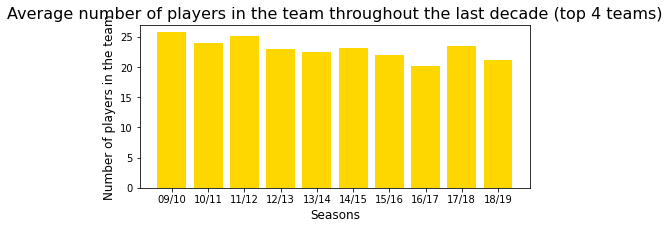

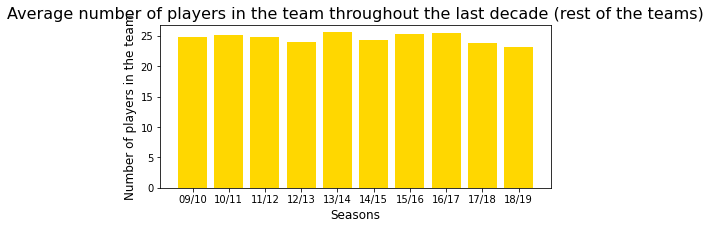

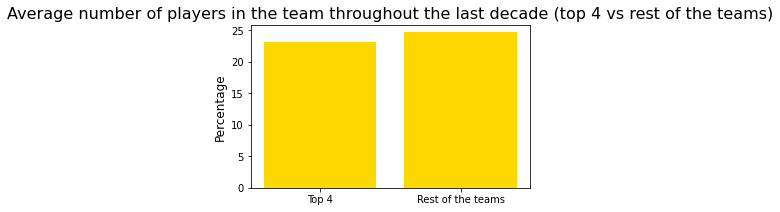

In [8]:
top4_avg_num_players, rest_teams_avg_num_players = num_of_players_avg(dfs,wiki_dfs)

plt.figure(figsize = (7,3))
plt.bar(seasons,top4_avg_num_players, color ="gold")
plt.title("Average number of players in the team throughout the last decade (top 4 teams)",fontsize=16)
plt.xlabel("Seasons",fontsize=12)
plt.ylabel("Number of players in the team",fontsize=12)

plt.figure(figsize = (7,3))
plt.bar(seasons,rest_teams_avg_num_players, color ="gold")
plt.title("Average number of players in the team throughout the last decade (rest of the teams)",fontsize=16)
plt.xlabel("Seasons",fontsize=12)
plt.ylabel("Number of players in the team",fontsize=12)

avg_top4_avg_num_players = sum(top4_avg_num_players)/10
avg_rest_teams_avg_num_players = sum(rest_teams_avg_num_players)/10
df_mc["Average num of players in the team"] = [avg_top4_avg_num_players, avg_rest_teams_avg_num_players]

plt.figure(figsize = (5,3))
plt.bar(["Top 4", "Rest of the teams"],[avg_top4_avg_num_players, avg_rest_teams_avg_num_players],  color ="gold")
plt.title("Average number of players in the team throughout the last decade (top 4 vs rest of the teams)",fontsize=16)
plt.ylabel("Percentage",fontsize=12)

In [9]:
# Investigate the top 4 teams, and the rest of the teams rotation

# The median of the players minutes in a team
def median_player_minutes(team,df):
    team_in_df = df.loc[df["Team"]==team]
    return team_in_df.sort_values("Minutes")["Minutes"].median()

# The median average of the players minutes
# in the top 4 teams, and the rest of the teams throughout the last decade
def median_avg_player_minutes(dfs,wiki_dfs):
    top4_avg = []
    rest_teams_avg = []
    
    for i in range(0,10):
        top4_temp_avg = []
        rest_teams_temp_avg = []
        
        top_4,rest_teams  = teams(wiki_dfs[i])
        
        for team in top_4:
            top4_temp_avg.append(median_player_minutes(team,dfs[i]))
        for team in rest_teams:
            rest_teams_temp_avg.append(median_player_minutes(team,dfs[i]))
            
        top4_avg.append(sum(top4_temp_avg)/4)
        rest_teams_avg.append(sum(rest_teams_temp_avg)/16)
    return top4_avg,rest_teams_avg

Text(0, 0.5, 'Minutes')

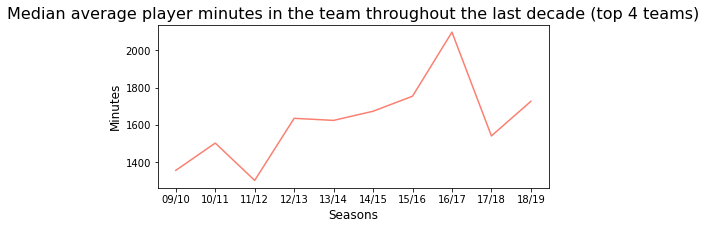

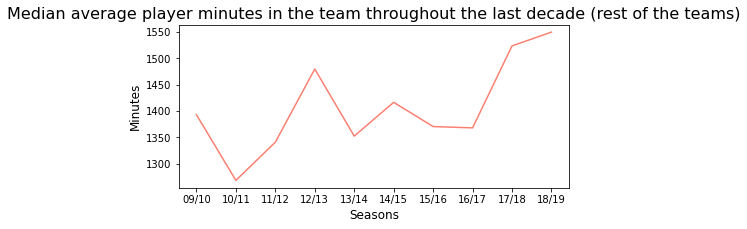

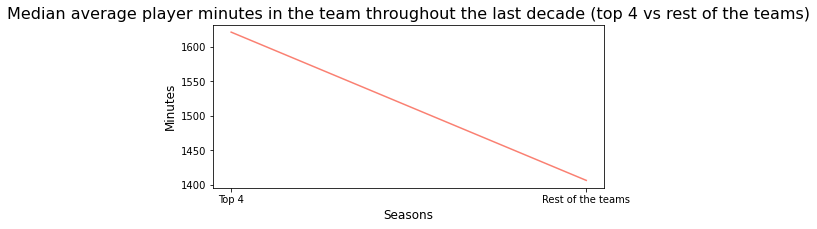

In [10]:
top4_median_avg_players_minutes, rest_teams_median_avg_players_minutes = median_avg_player_minutes(dfs,wiki_dfs)

plt.figure(figsize = (7,3))
plt.plot(seasons,top4_median_avg_players_minutes, color ="Salmon")
plt.title("Median average player minutes in the team throughout the last decade (top 4 teams)",fontsize=16)
plt.xlabel("Seasons",fontsize=12)
plt.ylabel("Minutes",fontsize=12)

plt.figure(figsize = (7,3))
plt.plot(seasons,rest_teams_median_avg_players_minutes, color ="Salmon")
plt.title("Median average player minutes in the team throughout the last decade (rest of the teams)",fontsize=16)
plt.xlabel("Seasons",fontsize=12)
plt.ylabel("Minutes",fontsize=12)

avg_top4_median_avg_players_minutes = sum(top4_median_avg_players_minutes)/10
avg_rest_teams_median_avg_players_minutes = sum(rest_teams_median_avg_players_minutes)/10
df_mc["Rotation"] = [avg_top4_median_avg_players_minutes, avg_rest_teams_median_avg_players_minutes]

plt.figure(figsize = (7,3))
plt.plot(["Top 4", "Rest of the teams"],[avg_top4_median_avg_players_minutes, avg_rest_teams_median_avg_players_minutes],
            color ="Salmon")

plt.title("Median average player minutes in the team throughout the last decade (top 4 vs rest of the teams)",fontsize=16)
plt.xlabel("Seasons",fontsize=12)
plt.ylabel("Minutes",fontsize=12)

In [11]:
# Investigate the top 4 teams, and the rest of the teams players with goal involvements

# The number of players with 5 or more goals in a team
def num_of_playres_with_many_goals(team,df, n=5):
    team_in_df = df.loc[df["Team"]==team]
    return len(team_in_df.loc[team_in_df["Goals"] >= n])

# The number of players with 5 or more assists in a team
def num_of_playres_with_many_assists(team,df, n=5):
    team_in_df = df.loc[df["Team"]==team]
    return len(team_in_df.loc[team_in_df["Assists"] >= n])


def avg_num_of_playres_with_many_goals_and_assists(dfs,wiki_dfs):
    top4_goals, top4_assists =[],[]
    rest_teams_goals, rest_teams_assists = [],[]
    
    for i in range(0,10):
        temp_top4_goals, temp_top4_assits =[],[]
        temp_rest_teams_goals, temp_rest_teams_assits =[],[]
        top_4, rest_teams = teams(wiki_dfs[i])
        
        for team in top_4:
            temp_top4_goals.append(num_of_playres_with_many_goals(team,dfs[i]))
            temp_top4_assits.append(num_of_playres_with_many_assists(team,dfs[i]))
        for team in rest_teams:
            temp_rest_teams_goals.append(num_of_playres_with_many_goals(team,dfs[i]))
            temp_rest_teams_assits.append(num_of_playres_with_many_assists(team,dfs[i]))
            
        top4_goals.append(sum(temp_top4_goals)/4)
        top4_assists.append(sum(temp_top4_assits)/4)
        
        rest_teams_goals.append(sum(temp_rest_teams_goals)/16)
        rest_teams_assists.append(sum(temp_rest_teams_assits)/16)
    return top4_goals, top4_assists, rest_teams_goals, rest_teams_assists

In [12]:
top4_goals, top4_assists, rest_teams_goals, rest_teams_assists = avg_num_of_playres_with_many_goals_and_assists(dfs,wiki_dfs)

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

x = np.arange(len(seasons))
width = 0.4

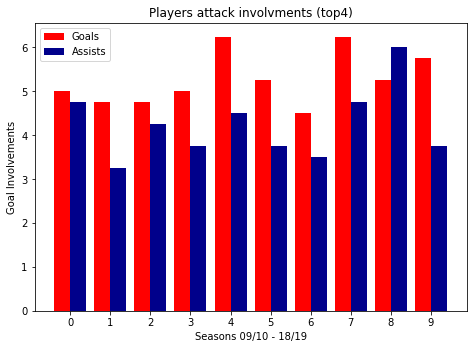

In [13]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, top4_goals, width, label='Goals', color = "Red")
rects2 = ax.bar(x + width/2, top4_assists, width, label='Assists', color = "darkBlue")

ax.set_ylabel('Goal Involvements')
ax.set_xlabel("Seasons 09/10 - 18/19")
ax.set_title('Players attack involvments (top4)')
ax.set_xticks(x)
ax.legend()
set_size(6,4)

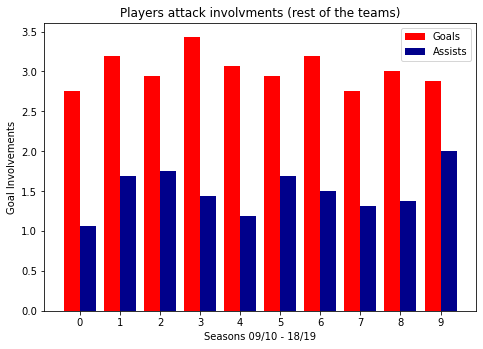

In [14]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rest_teams_goals, width, label='Goals', color = "Red")
rects2 = ax.bar(x + width/2, rest_teams_assists, width, label='Assists', color = "darkBlue")

ax.set_ylabel('Goal Involvements')
ax.set_xlabel("Seasons 09/10 - 18/19")
ax.set_title('Players attack involvments (rest of the teams)')
ax.set_xticks(x)
ax.legend()
set_size(6,4)

In [15]:
avg_top4_goals = sum(top4_goals)/10
avg_top4_assists = sum(top4_assists)/10

avg_rest_teams_goals = sum(rest_teams_goals)/10
avg_rest_teams_assists = sum(rest_teams_assists)/10

df_mc["Goals"] = [avg_top4_goals, avg_rest_teams_goals]
df_mc["Assists"] = [avg_top4_assists, avg_rest_teams_assists]

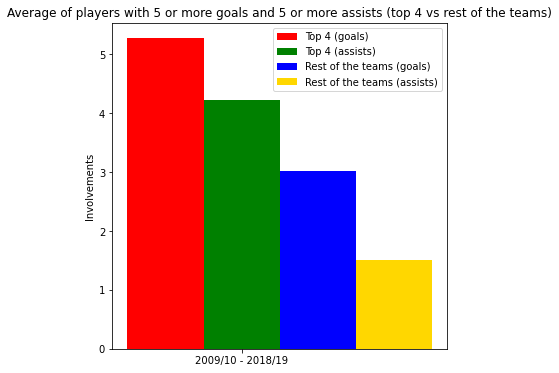

In [16]:
N = 1
ind = np.arange(N) 
width = 0.15

plt.figure(figsize=(6,6))

xvals = avg_top4_goals
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = avg_top4_assists
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = avg_rest_teams_goals
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

wvals = avg_rest_teams_assists
bar4 = plt.bar(ind+width*3, wvals, width, color = 'gold')

plt.xlabel("")
plt.ylabel('Involvements')
plt.title("Average of players with 5 or more goals and 5 or more assists (top 4 vs rest of the teams)")

plt.xticks(ind+width,(["2009/10 - 2018/19"]))
plt.legend((bar1, bar2,bar3, bar4),('Top 4 (goals)','Top 4 (assists)','Rest of the teams (goals)',"Rest of the teams (assists)") )

plt.show()

In [17]:
df_mc

,Top4 / Rest of the teams,Common nation percentage,Average players age,Average num of players in the team,Rotation,Goals,Assists
0,Top 4,0.277660,25.817026,23.07500,1621.525000,5.2750,4.225
1,Rest of the teams,0.345408,26.157155,24.65625,1406.021875,3.0125,1.500


In [18]:
# As we can see the "Average players age" and "Average num of players in the team" are very close
# So we decided to drop the two columns and investigate the rest
df_mc.drop(columns=["Average players age", "Average num of players in the team"], inplace = True)
df_mc

,Top4 / Rest of the teams,Common nation percentage,Rotation,Goals,Assists
0,Top 4,0.277660,1621.525000,5.2750,4.225
1,Rest of the teams,0.345408,1406.021875,3.0125,1.500


In [19]:
def df_for_ml(wiki_df,df):
    new_df = pd.DataFrame()
    new_df["Team"] = wiki_df["Team"]
    common_nation_percentage = []
    rotation = []
    goals = []
    assists = []
    for team in new_df["Team"]:
        common_nation_percentage.append(percentage_of_common_nation(team,df))
        rotation.append(median_player_minutes(team,df)) 
        goals.append(num_of_playres_with_many_goals(team,df))
        assists.append(num_of_playres_with_many_assists(team,df))
    new_df["Common nation percentage"] = common_nation_percentage
    new_df["Rotation"] = rotation
    new_df["Goals"] = goals
    new_df["Assists"] = assists
    return new_df

In [20]:
new_df = df_for_ml(wiki_df_2122,df_2122)
new_df

,Team,Common nation percentage,Rotation,Goals,Assists
0,Manchester City,0.285714,1007.0,5,1
1,Chelsea,0.304348,840.0,3,3
2,Liverpool,0.318182,623.0,3,3
3,Arsenal,0.318182,657.0,2,0
4,West Ham,0.352941,1163.0,2,2
5,Tottenham,0.285714,661.0,1,0
6,Manchester Utd,0.304348,631.0,2,1
7,Wolves,0.375000,1179.5,0,0
8,Leicester City,0.409091,769.0,3,0
9,Brighton,0.380952,855.0,1,0


In [21]:
new_df.to_excel("table_mc_learning.xlsx")